<a href="https://colab.research.google.com/github/Melo987/-v2/blob/main/NiN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install matplotlib==3.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install matplotlib_inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import torch
from torch import nn
from d2l import torch as d2l

In [8]:
def nin_block(in_channels,out_channels,kernel_size,strides,padding):
  return nn.Sequential(
      nn.Conv2d(in_channels,out_channels,kernel_size,strides,padding),nn.ReLU(),
      nn.Conv2d(out_channels,out_channels,kernel_size=1),nn.ReLU(),
      nn.Conv2d(out_channels,out_channels,kernel_size=1),nn.ReLU(),
  )

In [9]:
net = nn.Sequential(
    nin_block(1,96,kernel_size=11,strides=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,strides=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,strides=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    nin_block(384,10,kernel_size=3,strides=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    nn.Flatten()
)

In [10]:
X = torch.rand(size=(1,1,224,224))
for layer in net:
  X = layer(X)
  print(layer.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveMaxPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


In [11]:
lr,num_epochs,batch_size = 0.15,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


loss 0.800, train acc 0.677, test acc 0.671
1042.2 examples/sec on cuda:0


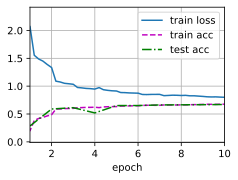

In [12]:
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

lr=0.05,loss 0.879, train acc 0.690, test acc 0.688

lr=0.15,loss 0.321, train acc 0.880, test acc 0.879

将网络中的全局平均池化层改为全局最大池化层，lr=0.15，loss 0.800, train acc 0.677, test acc 0.671，改成最大池化后精度都大幅度降低